# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 29

**Author 1 (sciper):** Ludovic Pujol (301033)  
**Author 2 (sciper):** Arthur André (287599)   
**Author 3 (sciper):** Octavio Profeta (301450)  

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1.Data visualization

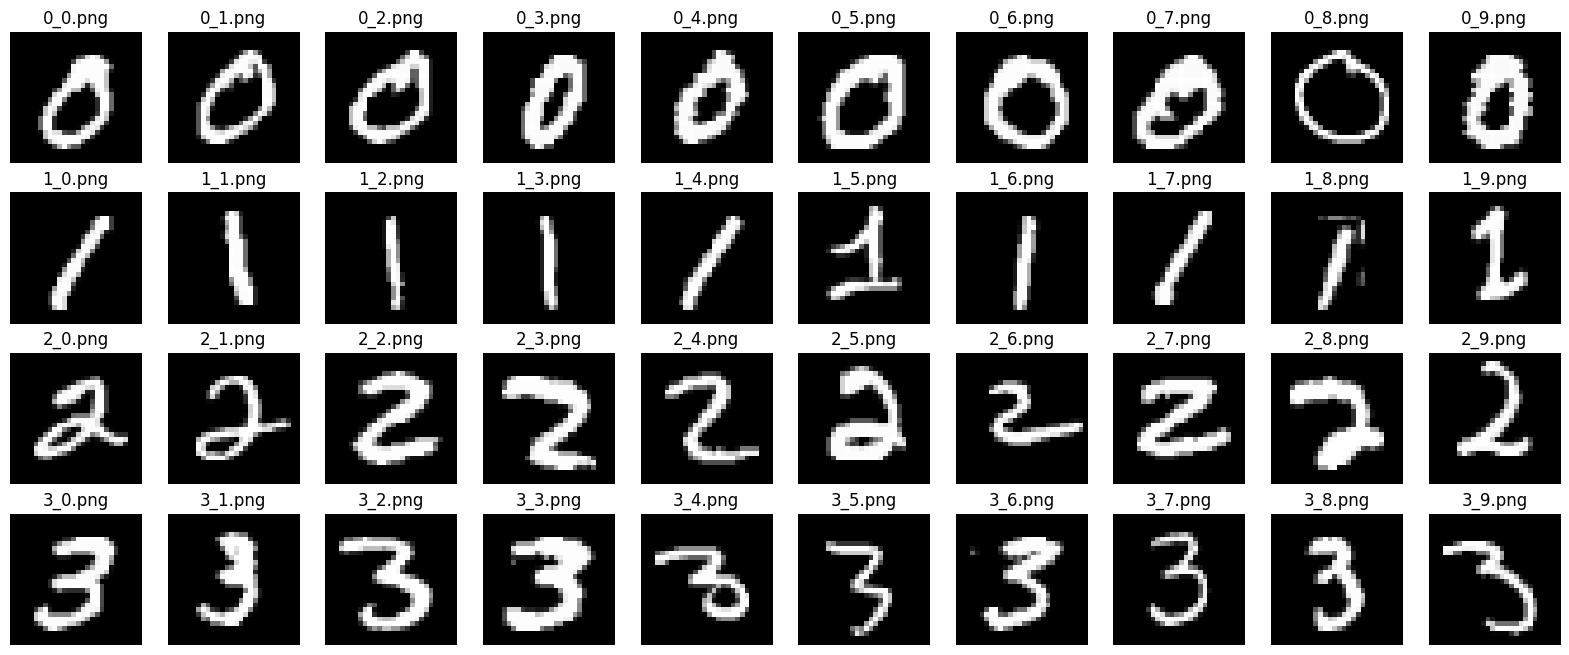

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import cv2




def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using the only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)  
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive an negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruc the image with the first _three fourier descriptors_, keep the first _three positive frecuencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

In [3]:
# TODO

# We see we can threshold the images, and remove small objects to keep only the number
from skimage.morphology import remove_small_objects

# Threshold function
def preprocess(image, threshold=50, size_obj=20):
    image = image > threshold
    image = remove_small_objects(image, size_obj)
    return image

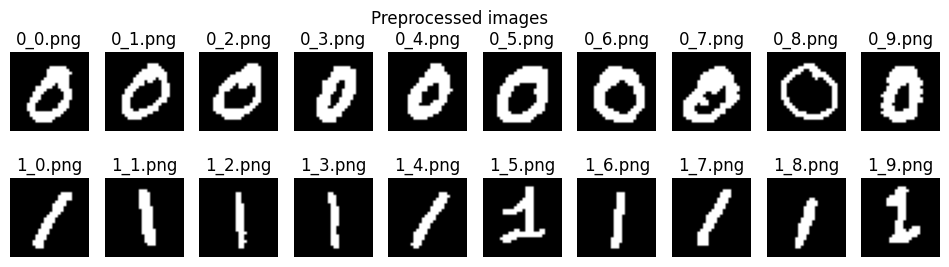

In [4]:
# TODO: Fill the lists below with your preprocessed images of "0"s and "1"s  
zeros = [preprocess(img) for img in zeros_im]
ones = [preprocess(img) for img in ones_im]

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

[TODO]

### 1.2. Get descriptors (4 pts)

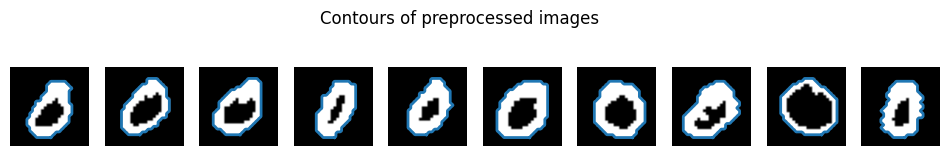

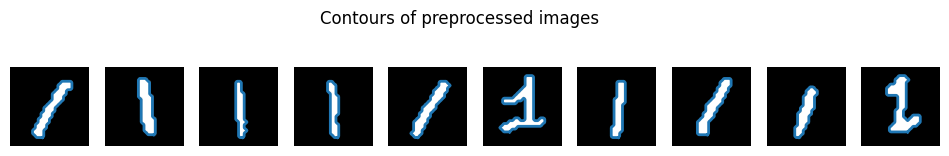

In [5]:
from skimage import measure

# Function to get the contours of a set of images using skimage
def get_contour(img):
    # Find contours of pixels with value >= 0.8 (take only the first contour that appears [0])
    contour = measure.find_contours(img, 0.5)[0]
    return contour

# Function to plot the contours of a set of images
def plot_contours(set): 
    # Get contours first
    contours = [get_contour(img) for img in set]
    # Then plot
    fig, axes = plt.subplots(1, len(set), figsize=(12, 2))
    for ax, img, contour in zip(axes, set, contours):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    fig.suptitle("Contours of preprocessed images")
    plt.show()

plot_contours(zeros)
plot_contours(ones)



## Explanation for Fourier descriptors

The index of each element of the Fourier coefficient array corresponds to a specific harmonic of the Fourier series expansion of the contour. The frequency of each harmonic is determined by its index in the array and the length of the contour. Specifically, the frequency of the n-th harmonic is given by n / L, where L is the length of the contour.

Therefore, the n-th element of the Fourier coefficient array corresponds to a frequency of n/L cycles per contour length, not necessarily the value of n itself.

In summary, the index of an element in the Fourier coefficient array corresponds to a specific harmonic of the Fourier series expansion of the contour, and the frequency of each harmonic is determined by its index and the length of the contour.

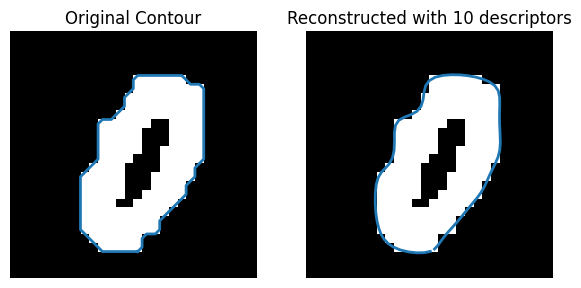

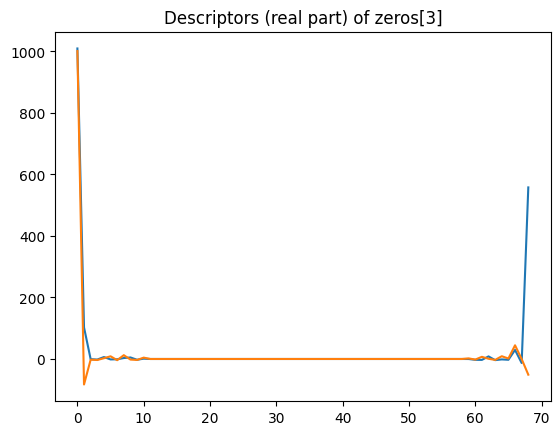

In [6]:
# Function that takes as input an image and returns a set of descriptors. 
# You may use other custom helper functions to break the code into useful chuncks.

# TODO

from scipy.fftpack import fft2, ifft2

def get_descriptors(img, N, display=False):
    
    # Get the 2D contour of the image
    cnt = get_contour(img)
    
    # Transform the contour into a complex number (x,1,real ; y,0,imag)
    cnt_z = cnt[:,0] + 1j*cnt[:,1]
    
    # Compute the 2D Fourier transform
    cnt_z_ft = np.fft.fft(cnt_z)
    descriptors = cnt_z_ft       # --> function return
    
    # Zero out all but the first num_descriptors coefficients
    cnt_z_ft[N+1:-N] = 0
    
    # Compute the inverse Fourier transform
    cnt_z_reconstructed = np.fft.ifft(cnt_z_ft)
    
    # Transform the complex number back into a 2D contour (x,1,real ; y,0,imag)
    cnt_reconstructed = np.array([cnt_z_reconstructed.real, cnt_z_reconstructed.imag]).T
    
    if (display):
        # Display the original and reconstructed contours
        plt.figure(figsize=(7,4))

        plt.subplot(1,2,1)
        plt.plot(cnt[:,1], cnt[:,0], linewidth=2)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title('Original Contour')

        plt.subplot(1,2,2)
        plt.imshow(img, cmap='gray')
        plt.plot(cnt_reconstructed[:,1], cnt_reconstructed[:,0], linewidth=2)
        plt.axis('off')
        plt.title('Reconstructed with {} descriptors'.format(N))
        plt.show()
    
    return descriptors


# Check first 10 descriptors of a test image (just to check that your pipeline works well)
descriptors = get_descriptors(zeros[3], 10, display=True)
plt.plot(descriptors.real)
plt.plot(descriptors.imag)
plt.title("Descriptors (real part) of zeros[3]")
plt.show()

#### Discussion

TODO

### 1.3. Study effect of descriptors (6 pts)

In [7]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros[3]
one = ones[5]

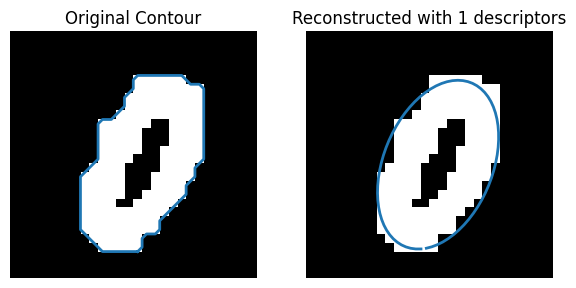

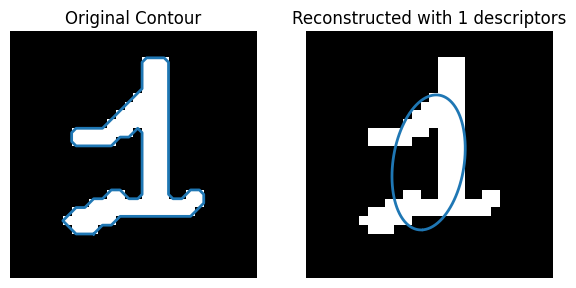

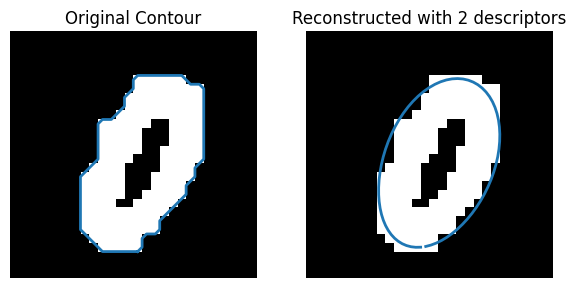

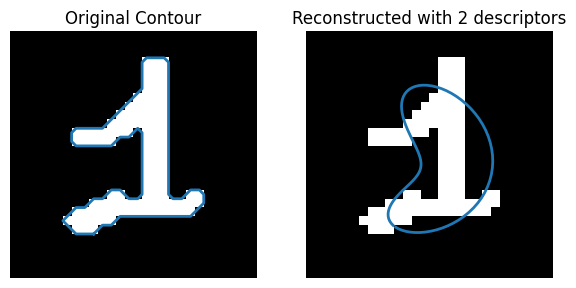

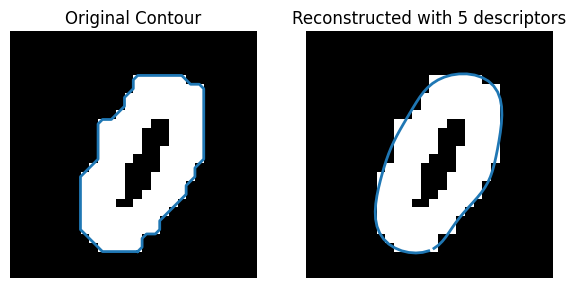

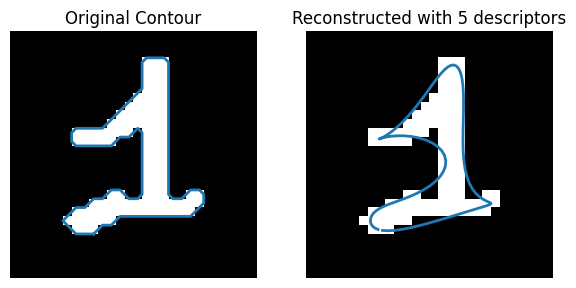

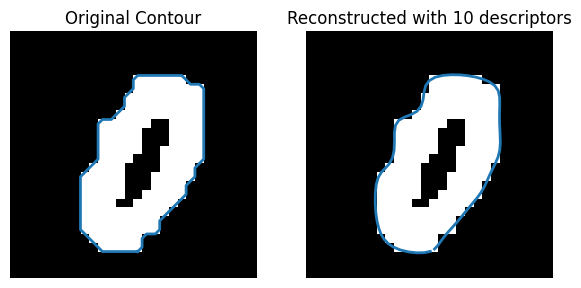

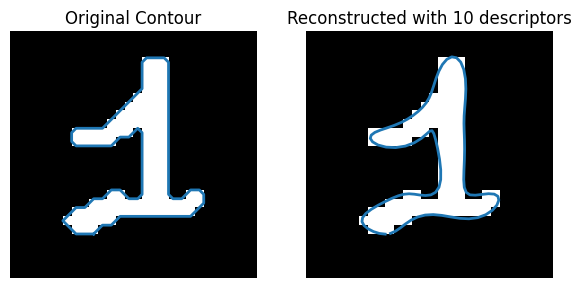

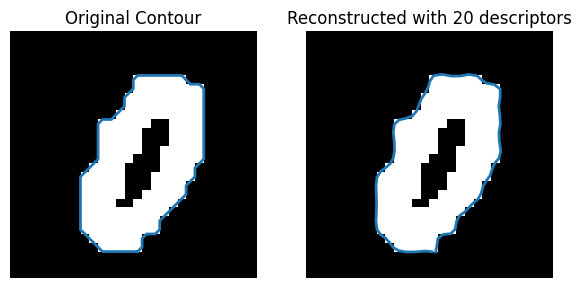

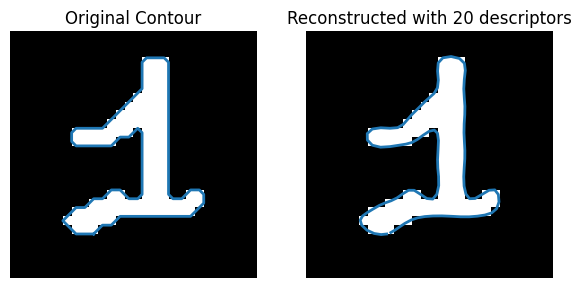

In [8]:
# TODO
for size in descr_set_sizes:
    # Get descriptors of the images
    get_descriptors(zero, size, display=True)
    get_descriptors(one, size, display=True)

#### Discussion

TODO

### 1.4 Clustering (2 pts)

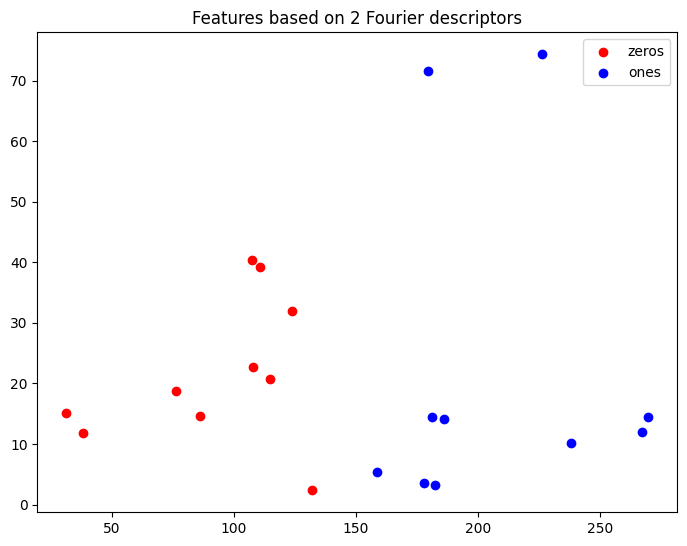

In [9]:
# Cluster with magnitude of the two first Fourier descriptors

# First feature for all "0"s
zeros_f1 = [np.abs(get_descriptors(zero, 3))[1] for zero in zeros]
# Second feature for all "0"s
zeros_f2 = [np.abs(get_descriptors(zero, 3))[2] for zero in zeros]
# Fist feature for all "1"s
ones_f1 = [np.abs(get_descriptors(one, 3))[1] for one in ones]
# Second feature for all "1"s
ones_f2 = [np.abs(get_descriptors(one, 3))[2] for one in ones]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

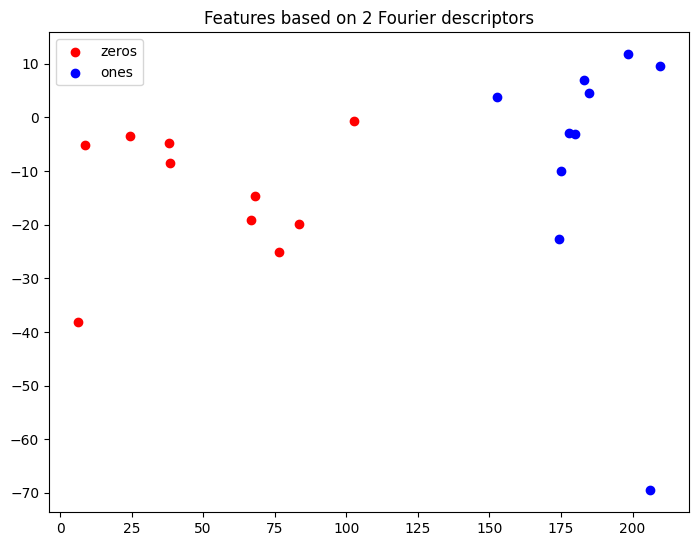

In [10]:
# Cluster with the real part of the two first Fourier descriptors

# First feature for all "0"s
zeros_f1 = [get_descriptors(zero, 3).real[1] for zero in zeros]
# Second feature for all "0"s
zeros_f2 = [get_descriptors(zero, 3).real[2] for zero in zeros]
# Fist feature for all "1"s
ones_f1 = [get_descriptors(one, 3).real[1] for one in ones]
# Second feature for all "1"s
ones_f2 = [get_descriptors(one, 3).real[2] for one in ones]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

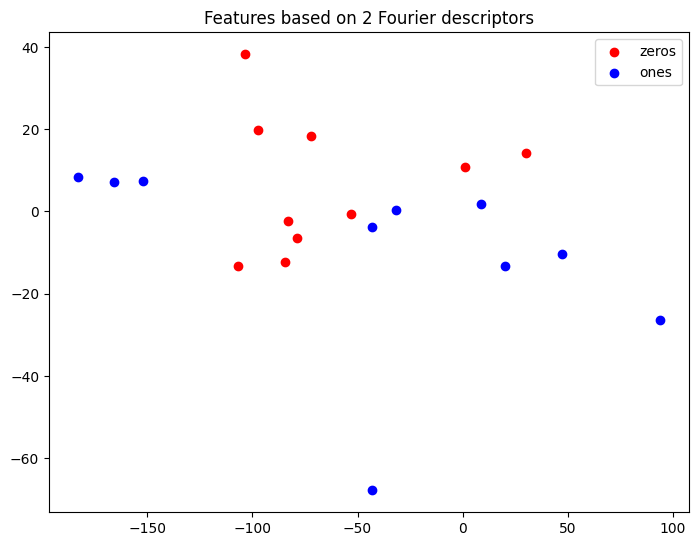

In [11]:
# Cluster with imaginary part of the two first Fourier descriptors

# First feature for all "0"s
zeros_f1 = [get_descriptors(zero, 3).imag[1] for zero in zeros]
# Second feature for all "0"s
zeros_f2 = [get_descriptors(zero, 3).imag[2] for zero in zeros]
# Fist feature for all "1"s
ones_f1 = [get_descriptors(one, 3).imag[1] for one in ones]
# Second feature for all "1"s
ones_f2 = [get_descriptors(one, 3).imag[2] for one in ones]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


TODO

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

From the theory given in class, we know that the Fourier descriptors are invariant to translation, rotation and scale. This is because the Fourier descriptors are the coefficients of the Fourier series expansion of the contour, and the Fourier series expansion is invariant to translation, rotation and scale.

For translation, invariance is obtained by truncating the the first Fourier descriptor $F_0$, which corresponds to the DC component of the Fourier series expansion. This is because the DC component is the average value of the contour, and the average value of the contour is variant under a translation.

For rotation, invariance is obtained by multiplying the Fourier descriptors by a factor of $e^{-j\theta}$, where $\theta$ is the angle of rotation. This is because the Fourier series expansion of a rotated contour is the Fourier series expansion of the original contour multiplied by $e^{j\theta}$. This means that rotation only affects the phase of the Fourier descriptors, and not their magnitude.

For scaling, invariance is obtained by scaling each Fourier descriptors by the absolute value of one of the Fourier descriptors. This is because the Fourier series expansion of a scaled contour is the Fourier series expansion of the original contour multiplied by the scale factor; this means that the ratio $F_i/F_j$ remains the same. However, we cannot choose $F_0$ as the Fourier descriptor to scale by, because $F_0$ is truncated for translation invariance. Therefore, we choose $F_1$ as the Fourier descriptor to scale by.

#### Implementation

In [12]:
# TODO: Implement a function that takes as input an image and outputs 
# a set of features invariant to scale, rotation and translation, according to function boolean parameters.
# You may use your functions defined in section 1.B.

def get_invariant_features(img, N=10, inv_to_rotation=False, inv_to_translation=False, inv_to_scale=False):
    
    descriptors = get_descriptors(img, N)
        
    if inv_to_translation:
        descriptors[0] = 0
        
    if inv_to_scale:
        descriptors = descriptors / np.abs(descriptors[1])
        
    if inv_to_rotation:
        descriptors = np.abs(descriptors)
    
    return descriptors

In [13]:
# LUDO

# CECI EST UN COPIER COLLER DE POUR ZOOMER UNE IMAGE
# https://stackoverflow.com/questions/37119071/scipy-rotate-and-zoom-an-image-without-changing-its-dimensions
# -- la fonction d'octa precedente marchait pas

import numpy as np
from scipy.ndimage import zoom


def clipped_zoom(img, zoom_factor, **kwargs):

    h, w = img.shape[:2]

    # For multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # Zooming out
    if zoom_factor < 1:

        # Bounding box of the zoomed-out image within the output array
        zh = int(np.round(h * zoom_factor))
        zw = int(np.round(w * zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        # Zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)

    # Zooming in
    elif zoom_factor > 1:

        # Bounding box of the zoomed-in region within the input array
        zh = int(np.round(h / zoom_factor))
        zw = int(np.round(w / zoom_factor))
        top = (h - zh) // 2
        left = (w - zw) // 2

        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)

        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # If zoom_factor == 1, just return the input array
    else:
        out = img
    return out

In [14]:
# OCTA

import random
import scipy.ndimage

# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    angle = random.randint(0,360)
    return scipy.ndimage.rotate(img, angle, mode='nearest', reshape=True)

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img):
    x = random.randint(-5,5)
    y = random.randint(-5,5)
    h, w = img.shape[:2]
    T = np.float32([[1,0,x],[0,1,y]])
    return cv2.warpAffine(img,T,(w,h))
    
# Define custom rotation function. You may add other parameters to the function.
def random_scale(img):
    scale = random.randint(50,125)
    return clipped_zoom(img, scale/100)

In [15]:
# We will define 4 sets of new images below

# TODO: Apply only rotation for each "0" and "1" and store results below
rotated_images_zeros = []
for im in zeros_im:
    rotated_images_zeros.append(random_rotate(im))
rotated_images_ones = []
for im in ones_im:
    rotated_images_ones.append(random_rotate(im))

# TODO: Apply only translation for each "0" and "1" and store results below
translated_images_zeros = []
for im in zeros_im:
    translated_images_zeros.append(random_translate(im))
translated_images_ones = []
for im in ones_im:
    translated_images_ones.append(random_translate(im))

# TODO: Apply only scaling for each "0" and "1" and store results below
scaled_images_zeros = []
for im in zeros_im:
    scaled_images_zeros.append(random_scale(im))
scaled_images_ones = []
for im in ones_im:
    scaled_images_ones.append(random_scale(im))

# TODO: Apply all 3 transformations sequentially, in your custom order, for each "0" and "1" and store results below
transformed_images_zeros = []
for im in zeros_im:
    transformed_images_zeros.append(random_scale(random_translate(random_rotate(im))))
transformed_images_ones = []
for im in ones_im:
    transformed_images_ones.append(random_scale(random_translate(random_rotate(im))))

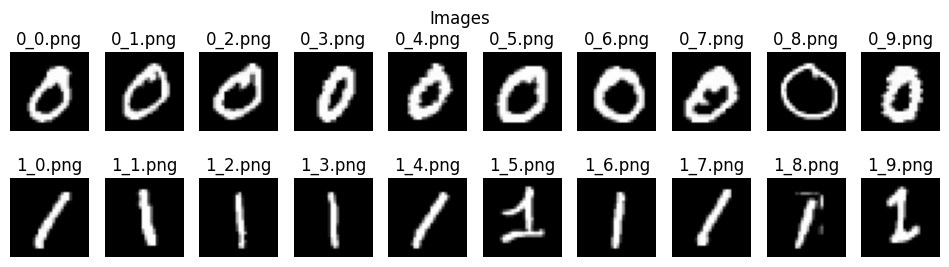

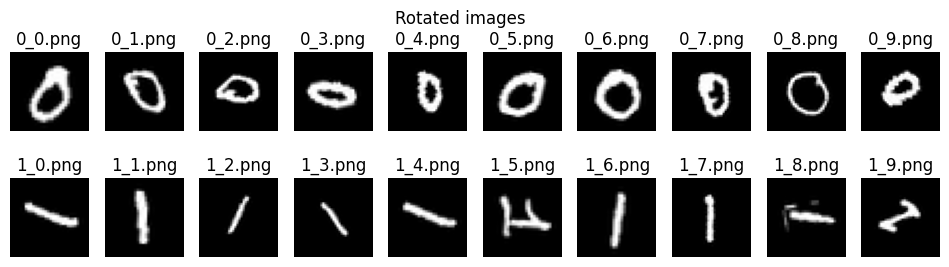

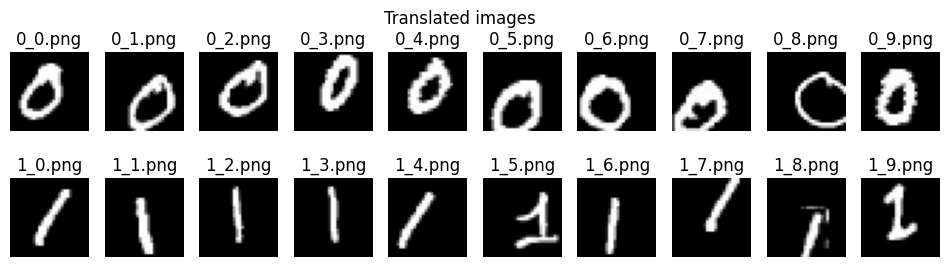

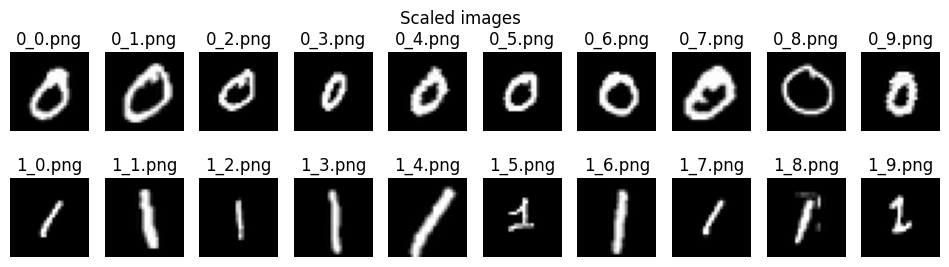

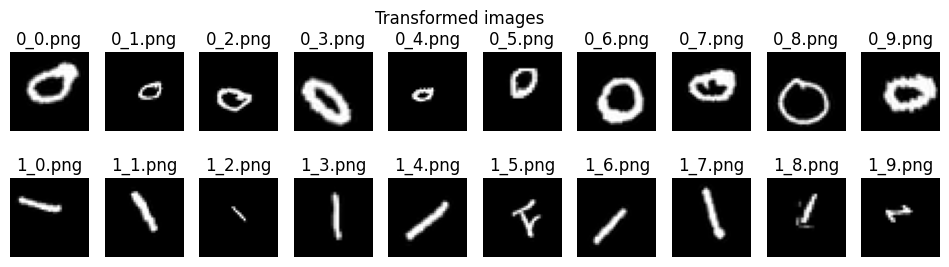

In [16]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!
# TODO

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Images")
plt.show()

# Plot rotated images
fig, axes2 = plt.subplots(2, len(rotated_images_zeros), figsize=(12, 3))
for ax2, im, nm in zip(axes2[0], rotated_images_zeros, zeros_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
for ax2, im, nm in zip(axes2[1], rotated_images_ones, ones_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
fig.suptitle("Rotated images")
plt.show()

# Plot translated images
fig, axes2 = plt.subplots(2, len(translated_images_zeros), figsize=(12, 3))
for ax2, im, nm in zip(axes2[0], translated_images_zeros, zeros_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
for ax2, im, nm in zip(axes2[1], translated_images_ones, ones_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
fig.suptitle("Translated images")
plt.show()

# Plot scaled images
fig, axes2 = plt.subplots(2, len(scaled_images_zeros), figsize=(12, 3))
for ax2, im, nm in zip(axes2[0], scaled_images_zeros, zeros_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
for ax2, im, nm in zip(axes2[1], scaled_images_ones, ones_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
fig.suptitle("Scaled images")
plt.show()

# Plot transformed images
fig, axes2 = plt.subplots(2, len(transformed_images_zeros), figsize=(12, 3))
for ax2, im, nm in zip(axes2[0], transformed_images_zeros, zeros_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
for ax2, im, nm in zip(axes2[1], transformed_images_ones, ones_names):
    ax2.imshow(im, cmap='gray')
    ax2.axis('off')
    ax2.set_title(nm)
fig.suptitle("Transformed images")
plt.show()

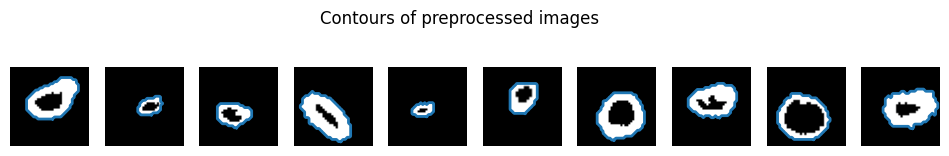

IndexError: list index out of range

In [17]:
trans_zeros = [preprocess(zero) for zero in transformed_images_zeros]
trans_ones = [preprocess(one) for one in transformed_images_ones]

plot_contours(trans_zeros)
plot_contours(trans_ones)

In [18]:
trans_zeros = [preprocess(zero) for zero in transformed_images_zeros]
trans_ones = [preprocess(one) for one in transformed_images_ones]

# Cluster with invariant features

# First feature for all "0"s
zeros_f1 = [get_invariant_features(zero, 3, True, True, True)[1] for zero in trans_zeros]
# Second feature for all "0"s
zeros_f2 = [get_invariant_features(zero, 3, True, True, True)[2] for zero in trans_zeros]
# Fist feature for all "1"s
ones_f1 = [get_invariant_features(one, 3, True, True, True)[1] for one in trans_ones]
# Second feature for all "1"s
ones_f2 = [get_invariant_features(one, 3, True, True, True)[2] for one in trans_ones]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

IndexError: list index out of range

In [19]:
def invariant_fourier_descriptors(contour):
    # Compute centroid
    centroid = np.mean(contour, axis=0)

    # Translate contour to origin
    contour -= centroid

    # Convert to polar coordinates
    angles = np.arctan2(contour[:, 1], contour[:, 0])
    distances = np.sqrt(np.sum(contour**2, axis=1))
    polar_contour = np.column_stack((angles, distances))

    # Sort by angle
    polar_contour = polar_contour[polar_contour[:, 0].argsort()]

    # Scale contour to unit circumference
    circumference = np.sum(distances)
    scale_factor = contour.shape[0] / circumference
    scaled_contour = contour * scale_factor

    # Calculate Fourier descriptors
    descriptors = np.fft.fft(scaled_contour[:, 0] + 1j * scaled_contour[:, 1])

    # Take absolute value to make descriptors invariant to mirroring
    descriptors_abs = np.abs(descriptors)

    # Return descriptors
    return descriptors, descriptors_abs

97
87


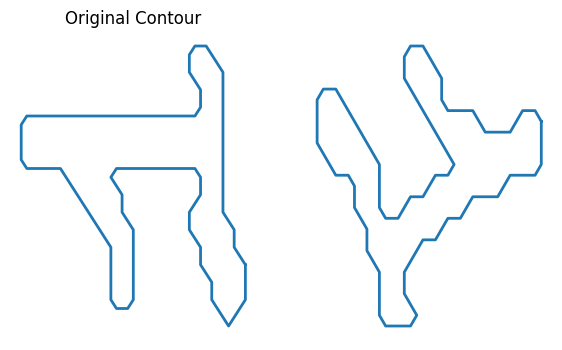

In [30]:
contour_test = get_contour(ones[5])

descriptors_gt, abs_gt = invariant_fourier_descriptors(contour_test)

print(len(contour_test))

#plt.plot(np.real(descriptors_gt), np.imag(descriptors_gt), 'o')

contour_rot = get_contour(preprocess(transformed_images_ones[5], 50, 15))

print(len(contour_rot))

descriptors_rot, abs_rot = invariant_fourier_descriptors(contour_rot)

#plt.plot(np.real(descriptors_rot), np.imag(descriptors_rot), 'o')


cnt_reconstructed_gt = np.fft.ifft(descriptors_gt)
    
    # Transform the complex number back into a 2D contour (x,1,real ; y,0,imag)
cnt_reconstructed_gt = np.array([cnt_reconstructed_gt.imag, cnt_reconstructed_gt.real]).T

cnt_reconstructed_rot = np.fft.ifft(descriptors_rot)
    
    # Transform the complex number back into a 2D contour (x,1,real ; y,0,imag)
cnt_reconstructed_rot = np.array([cnt_reconstructed_rot.imag, cnt_reconstructed_rot.real]).T


plt.figure(figsize=(7,4))

plt.subplot(1,2,1)
plt.plot(cnt_reconstructed_gt[:,1], cnt_reconstructed_gt[:,0], linewidth=2)
plt.axis('off')
plt.title('Original Contour')

plt.subplot(1,2,2)
#plt.imshow(img, cmap='gray')
plt.plot(cnt_reconstructed_rot[:,1], cnt_reconstructed_rot[:,0], linewidth=2)
plt.axis('off')
plt.show()

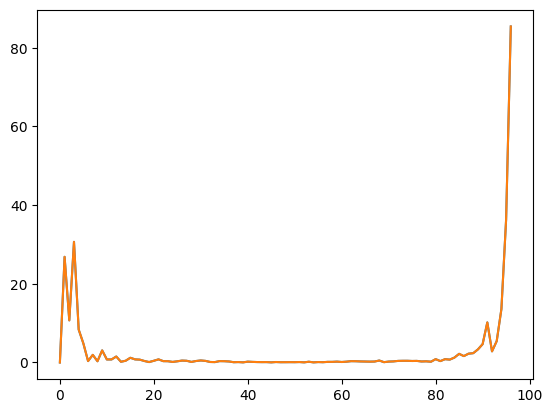

In [21]:
plt.plot(abs_gt)
plt.plot(abs_rot)
plt.show()

#### Discussion

TODO

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.3. Cluster on compacity (6 pts)

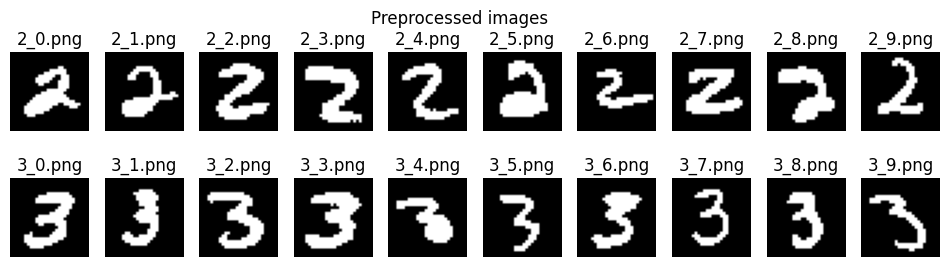

In [ ]:
# TODO
twos = preprocess(twos_im)
threes = preprocess(threes_im)

# We can remove small holes so that the we take into account the pixels inside the '2' hole
from skimage.morphology import remove_small_holes
twos = [remove_small_holes(two) for two in twos]
threes = [remove_small_holes(three) for three in threes]

# Plot images
fig, axes = plt.subplots(2, len(twos), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

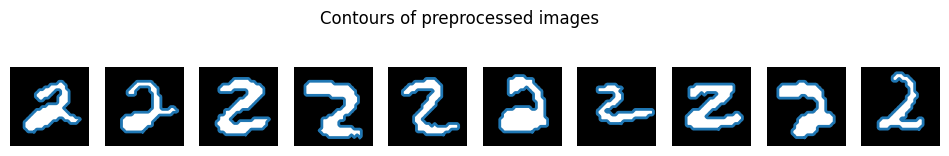

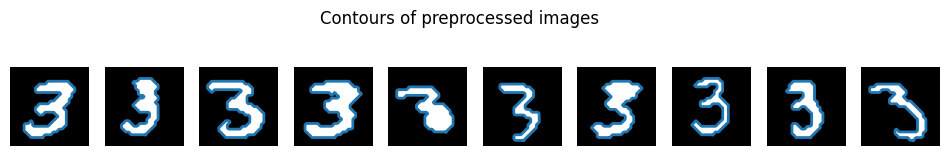

In [ ]:
# Plot the contours of the images
plot_contours(twos)
plot_contours(threes)

In [ ]:
# To compute the compacity --> get the area and perimeter of the figures

def get_area(set):
    # Chose to compute the area as the number of white pixels in the image
    area = []
    for im in set:
        area.append(np.sum(im))
    return np.array(area)

def get_perimeter(set):
    # Chose to compute the perimeter as the number of points in the contour
    return np.array([len(get_contour(img)) for img in set])

In [ ]:
# Compute compacity P^2/A
A2 = get_area(twos)
P2 = get_perimeter(twos)
compacity2 = P2**2/A2

A3 = get_area(threes)
P3 = get_perimeter(threes)
compacity3 = P3**2/A3

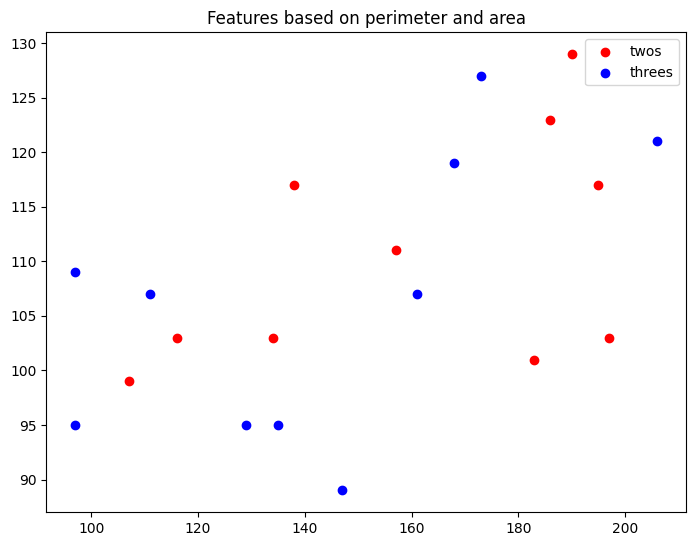

In [ ]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = A2
twos_f2 = P2
threes_f1 = A3
threes_f2 = P3

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

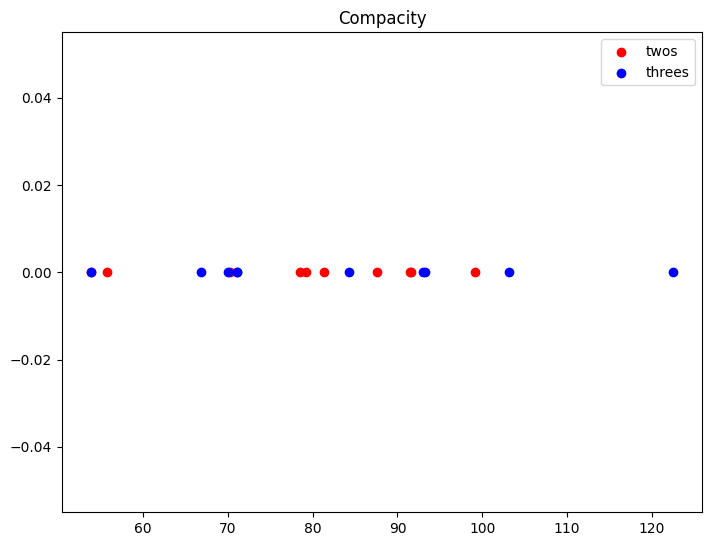

In [ ]:
# TODO: Make the 1D plot of the compacity
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(compacity2, np.zeros(len(compacity2)), color='r', label='twos')
ax.scatter(compacity3, np.zeros(len(compacity3)), color='b', label='threes')
ax.legend(loc='best')
plt.title("Compacity")
plt.show()

####  Discussion

The results are not as good as the ones obtained with the Fourier descriptors. The images of 2 and 3 are very similar in area and perimeter, resulting in a very similar compacity. The compacity would have been a good clustering feature if the images were not so similar in shape (clustering 0 vs 3 for example).

Because we are not able to obtain satisfying results for the 2D plot, it will be sure that the 1D plot will not be good either.

However, this method is gives features that are invariant to translation, rotation and scale. The area and perimeters are invariant to rotation and translation, and compacity is invariant to scale.

### 2.2. Additional method (4 pts)

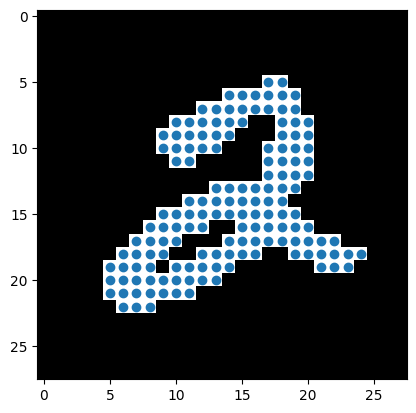

[29.06443446 14.30959057]


In [ ]:
# TODO

img = twos[0]

# get the position of all the white pixels
pxl_pos = np.where(img)

# Plot to be sure
plt.imshow(img, cmap='gray')
plt.plot(pxl_pos[1], pxl_pos[0], 'o')
plt.show()

# get the covariance matrix of the object
cov = np.cov(pxl_pos)

# Compute the eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(cov)

# Print the eigenvalues
print(eig_val)

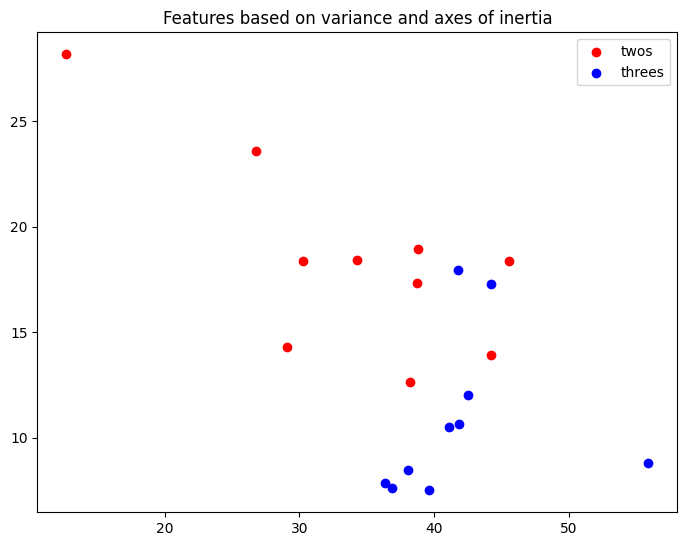

In [ ]:
# It seems to work, we can create the function
def get_eigenvalues(img):
    pxl_pos = np.where(img)
    cov = np.cov(pxl_pos)
    eig_val, eig_vec = np.linalg.eig(cov)
    return eig_val

# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = [get_eigenvalues(two)[0] for two in twos]
twos_f2 = [get_eigenvalues(two)[1] for two in twos]
threes_f1 = [get_eigenvalues(three)[0] for three in threes]
threes_f2 = [get_eigenvalues(three)[1] for three in threes]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on variance and axes of inertia")
plt.show()

From the results it seems that the 3s are more compact than the 2s around their first axe of inertia (the blue points are lower than the red ones, showing a lower variance around the axe). We can cluster the 3s and 2s more easily than with the previous compacity method, but the Fourier descriptors are still better features for clustering.

The variance method is invariant to translation, rotation and scale, because the the variance is computed as the distance from the pixels to the axes of inertias. The axes are inveriant to all these transformations, thus the variance is invariant.